# Analyse des votes des députés de l'Assemblée nationale par analyse des composantes principales

L'objectif de ce document est de déterminer s'il est possible d'inférer une position lattente pertinente pour les député.e.s de l'Assemblée nationale en examinant leurs votes aux différents scrutins via une ACP.

L'expérience menée ci-dessous montre qu'une ACP permet bien de placer les député.e.s de l'Assemblée nationale dans un nuage de points en 2 dimensions dont le poids relatifs des axes est 33.71 % et 10.19 %.

L'analyse des deux axes individuellements montrent que l'on peut interpréter l'axe 1 comme étant l'axe de l'opposition au grouvernement et l'axe deux comme celui du positionnement sur l'axe gauche-droite.

https://marie-chavent.perso.math.cnrs.fr/wp-content/uploads/2013/10/cours_ACM.pdf

https://seaborn.pydata.org/examples/hexbin_marginals.html

L'ensemble des librairies utilisées dans ce document sont décrites ci-dessous.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [2]:
# Importer des votes des député.e.s de l'Assemblée nationale
df = pd.read_csv("data\\20230430_Data_Votes_Deputes.csv")
df

,identifiant,Prénom,Nom,Région,Département,Numéro de circonscription,Profession,Groupe politique (complet),Groupe politique (abrégé),VTANR5L16V1,...,VTANR5L16V990,VTANR5L16V991,VTANR5L16V992,VTANR5L16V993,VTANR5L16V994,VTANR5L16V995,VTANR5L16V996,VTANR5L16V997,VTANR5L16V998,VTANR5L16V999
0,PA642868,Paul,Christophe,Hauts-de-France,Nord,14,Fonctionnaire de catégorie A,Horizons et apparentés,HOR,NaN,...,contres,contres,contres,contres,contres,contres,contres,contres,contres,contres
1,PA719146,Jean-Félix,Acquaviva,Corse,Haute-Corse,2,Cadre,"Libertés, Indépendants, Outre-mer et Territoires",LIOT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PA795692,William,Martinet,Ile-de-France,Yvelines,11,Cadre administratif,La France insoumise - Nouvelle Union Populaire...,LFI - NUPES,pours,...,NaN,pours,pours,pours,pours,pours,pours,pours,pours,pours
3,PA795050,Astrid,Panosyan-Bouvet,Ile-de-France,Paris,4,Cadre administratif et commercial d'entreprise,Renaissance,RE,NaN,...,contres,contres,contres,contres,contres,contres,contres,contres,contres,contres
4,PA719412,Sandrine,Le Feur,Bretagne,Finistère,4,Agriculteur-propriétaire exploitant,Renaissance,RE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,PA793664,Marie,Pochon,Auvergne-Rhône-Alpes,Drôme,3,Responsable associative,Écologiste - NUPES,Ecolo - NUPES,pours,...,NaN,pours,pours,pours,pours,pours,pours,pours,NaN,NaN
573,PA721182,Frédéric,Petit,Français établis hors de France,Français établis hors de France,7,Ingénieur,Démocrate (MoDem et Indépendants),Dem,NaN,...,contres,contres,contres,contres,contres,contres,contres,contres,contres,contres
574,PA757225,Mikaele,Seo,Wallis-et-Futuna,Wallis-et-Futuna,1,Profession intermédiaire administrative de la ...,Renaissance,RE,NaN,...,NaN,contres,contres,contres,contres,contres,contres,contres,NaN,NaN
575,PA794802,Charles,Sitzenstuhl,Grand Est,Bas-Rhin,5,Cadre de la fonction publique,Renaissance,RE,NaN,...,contres,contres,contres,contres,contres,contres,contres,contres,contres,contres


In [3]:
# Supprimer les colonnes spécifiées
df = df.drop(columns=['Prénom', 'Nom', 'Région', 'Département', 'Numéro de circonscription', 'Profession', 'Groupe politique (complet)', 'Groupe politique (abrégé)'])

# Mettre la colonne "identifiant" en index
df = df.set_index('identifiant')

# Changer les valeurs "pours" et "contres" respectivement par -1 et 1
df = df.replace("pours", 1)
df = df.replace("contres", -1)

# Créer une fonction lambda qui remplace les valeurs non souhaitées par 0
replace_func = lambda x: 0 if x not in [-1, 1] else x

# Appliquer la fonction lambda à chaque cellule du dataframe
df = df.applymap(replace_func)

# Afficher le DataFrame mis à jour
df

,VTANR5L16V1,VTANR5L16V10,VTANR5L16V100,VTANR5L16V1000,VTANR5L16V1001,VTANR5L16V1002,VTANR5L16V1003,VTANR5L16V1004,VTANR5L16V1005,VTANR5L16V1006,...,VTANR5L16V990,VTANR5L16V991,VTANR5L16V992,VTANR5L16V993,VTANR5L16V994,VTANR5L16V995,VTANR5L16V996,VTANR5L16V997,VTANR5L16V998,VTANR5L16V999
identifiant,,,,,,,,,,,,,,,,,,,,,
PA642868,0,-1,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
PA719146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PA795692,1,0,0,1,1,1,1,1,0,0,...,0,1,1,1,1,1,1,1,1,1
PA795050,0,-1,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
PA719412,0,0,-1,0,0,0,-1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA793664,1,-1,0,0,0,0,0,1,0,0,...,0,1,1,1,1,1,1,1,0,0
PA721182,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
PA757225,0,0,0,0,0,0,0,-1,0,0,...,0,-1,-1,-1,-1,-1,-1,-1,0,0


In [4]:
# Centrer-réduire les colonnes
normalize_func = lambda x: (x*(len(df.index) / sum(x))-1) if sum(x) != 0 else x
df_normalized = df.applymap(replace_func).apply(normalize_func)
df_normalized

,VTANR5L16V1,VTANR5L16V10,VTANR5L16V100,VTANR5L16V1000,VTANR5L16V1001,VTANR5L16V1002,VTANR5L16V1003,VTANR5L16V1004,VTANR5L16V1005,VTANR5L16V1006,...,VTANR5L16V990,VTANR5L16V991,VTANR5L16V992,VTANR5L16V993,VTANR5L16V994,VTANR5L16V995,VTANR5L16V996,VTANR5L16V997,VTANR5L16V998,VTANR5L16V999
identifiant,,,,,,,,,,,,,,,,,,,,,
PA642868,-1.00000,2.952055,-1.000000,3.181159,3.092199,2.651899,2.796053,3.808333,4.061404,4.198198,...,17.03125,3.543307,5.788235,6.303797,6.123457,6.036585,21.192308,25.227273,7.485294,3.181159
PA719146,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
PA795692,2.97931,-1.000000,-1.000000,-5.181159,-5.092199,-4.651899,-4.796053,-5.808333,-1.000000,-1.000000,...,-1.00000,-5.543307,-7.788235,-8.303797,-8.123457,-8.036585,-23.192308,-27.227273,-9.485294,-5.181159
PA795050,-1.00000,2.952055,-1.000000,3.181159,3.092199,2.651899,2.796053,3.808333,4.061404,4.198198,...,17.03125,3.543307,5.788235,6.303797,6.123457,6.036585,21.192308,25.227273,7.485294,3.181159
PA719412,-1.00000,-1.000000,5.073684,-1.000000,-1.000000,-1.000000,2.796053,3.808333,-1.000000,-1.000000,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA793664,2.97931,2.952055,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-5.808333,-1.000000,-1.000000,...,-1.00000,-5.543307,-7.788235,-8.303797,-8.123457,-8.036585,-23.192308,-27.227273,-1.000000,-1.000000
PA721182,-1.00000,2.952055,5.073684,3.181159,3.092199,2.651899,2.796053,3.808333,4.061404,4.198198,...,17.03125,3.543307,5.788235,6.303797,6.123457,6.036585,21.192308,25.227273,7.485294,3.181159
PA757225,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.808333,-1.000000,-1.000000,...,-1.00000,3.543307,5.788235,6.303797,6.123457,6.036585,21.192308,25.227273,-1.000000,-1.000000


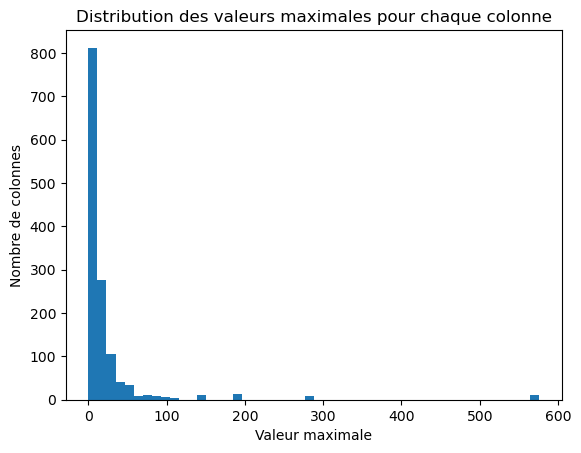

In [5]:
# Trouver les valeurs maximales pour chaque colonne
max_values = df_normalized.max()

# Créer un histogramme de la distribution des valeurs maximales
plt.hist(max_values, bins=50)
plt.xlabel('Valeur maximale')
plt.ylabel('Nombre de colonnes')
plt.title('Distribution des valeurs maximales pour chaque colonne')
plt.show()

In [6]:
# Trouver les colonnes où la valeur maximale est supérieure à 15
cols_to_drop = df_normalized.columns[df_normalized.max() > 15]

# Supprimer les colonnes trouvées du DataFrame
df_normalized = df_normalized.drop(cols_to_drop, axis=1)
df_normalized.describe()

,VTANR5L16V1,VTANR5L16V10,VTANR5L16V100,VTANR5L16V1000,VTANR5L16V1001,VTANR5L16V1002,VTANR5L16V1003,VTANR5L16V1004,VTANR5L16V1005,VTANR5L16V1006,...,VTANR5L16V988,VTANR5L16V989,VTANR5L16V99,VTANR5L16V991,VTANR5L16V992,VTANR5L16V993,VTANR5L16V994,VTANR5L16V995,VTANR5L16V998,VTANR5L16V999
count,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,...,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02
mean,4.925773e-17,2.462886e-17,-5.541494e-17,8.620103e-17,-9.851546e-17,-1.231443e-17,4.925773e-17,4.925773e-17,-6.157216e-18,-5.849355e-17,...,-7.696520e-17,-6.157216e-17,-4.925773e-17,-2.462886e-17,-6.157216e-17,-1.231443e-17,8.004381e-17,6.772938e-17,-9.851546e-17,8.620103e-17
std,1.727566e+00,2.799649e+00,3.555242e+00,2.792850e+00,2.731031e+00,2.301302e+00,2.811486e+00,3.310542e+00,2.963586e+00,3.029546e+00,...,1.579612e+00,6.731394e+00,7.967814e+00,3.093531e+00,4.935417e+00,5.307689e+00,5.154852e+00,5.047202e+00,6.264853e+00,2.803697e+00
min,-1.000000e+00,-4.952055e+00,-7.073684e+00,-5.181159e+00,-5.092199e+00,-4.651899e+00,-4.796053e+00,-5.808333e+00,-6.061404e+00,-6.198198e+00,...,-3.885000e+00,-1.327660e+01,-1.411364e+01,-5.543307e+00,-7.788235e+00,-8.303797e+00,-8.123457e+00,-8.036585e+00,-9.485294e+00,-5.181159e+00
25%,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
50%,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
75%,2.979310e+00,2.952055e+00,5.073684e+00,3.181159e+00,3.092199e+00,2.651899e+00,2.796053e+00,3.808333e+00,4.061404e+00,4.198198e+00,...,1.885000e+00,-1.000000e+00,-1.000000e+00,3.543307e+00,5.788235e+00,6.303797e+00,6.123457e+00,6.036585e+00,7.485294e+00,3.181159e+00
max,2.979310e+00,2.952055e+00,5.073684e+00,3.181159e+00,3.092199e+00,2.651899e+00,2.796053e+00,3.808333e+00,4.061404e+00,4.198198e+00,...,1.885000e+00,1.127660e+01,1.211364e+01,3.543307e+00,5.788235e+00,6.303797e+00,6.123457e+00,6.036585e+00,7.485294e+00,3.181159e+00


In [15]:
# Créer un objet PCA avec 10 composantes
pca = PCA(n_components=10)

# Appliquer l'ACP sur la matrice de distance
dist_pca = pca.fit_transform(df_normalized)

# Obtenir le pourcentage expliqué par chaque axe principal
variance_ratio = pca.explained_variance_ratio_

# Afficher le pourcentage expliqué par chaque axe principal
for i, ratio in enumerate(variance_ratio):
    print(f"Composante {i+1}: {ratio*100:.2f}%")

Composante 1: 33.71%
Composante 2: 10.19%
Composante 3: 2.45%
Composante 4: 1.51%
Composante 5: 1.34%
Composante 6: 1.12%
Composante 7: 1.07%
Composante 8: 0.97%
Composante 9: 0.94%
Composante 10: 0.92%


In [8]:
# Créer un objet PCA avec une seule dimension
pca = PCA(n_components=2)

# Appliquer l'ACP sur la matrice de distance
dist_pca = pca.fit_transform(df_normalized)

# Convertir la matrice PCA en un DataFrame Pandas
dist_pca_df = pd.DataFrame(data=dist_pca, index=df_normalized.index, columns=['Position 1','Position 2'])

# Afficher le DataFrame avec les positions des législateurs sur l'axe unidimensionnel
dist_pca_df

,Position 1,Position 2
identifiant,,
PA642868,94.887436,12.789372
PA719146,-28.976071,-7.897655
PA795692,-89.044392,-55.233056
PA795050,87.435310,-0.673458
PA719412,47.294856,-27.345039
...,...,...
PA793664,-60.671880,-53.841414
PA721182,73.083292,10.177228
PA757225,18.994131,0.496572


In [9]:
# Importer les informations à disposition sur les député.e.s de l'AN
df_2 = pd.read_csv("data\\20230430_Data_Votes_Deputes.csv")

# Réinitialiser l'index de dist_pca_df pour créer une colonne 'identifiant'
dist_pca_df = dist_pca_df.reset_index()

# Fusionner les DataFrames en fonction de la colonne 'identifiant'
merged_df = dist_pca_df.merge(df_2[['identifiant', 'Groupe politique (abrégé)','Prénom','Nom']], on='identifiant')

# concaténer les colonnes 'prénom' et 'nom' dans une nouvelle colonne 'Nom complet'
merged_df['Nom complet'] = merged_df['Prénom'] + ' ' + merged_df['Nom']

# supprimer les colonnes 'nom' et 'prénom'
merged_df.drop(['Nom', 'Prénom'], axis=1, inplace=True)

# Rétablir l'index de merged_df à partir de la colonne 'identifiant'
merged_df = merged_df.set_index('identifiant')

# Sélectionner les colonnes Position 1 et Position 2 de merged_df
X = merged_df[['Position 1', 'Position 2']]

# Instancier un objet StandardScaler
scaler = StandardScaler()

# Centrer-réduire les données
X_scaled = scaler.fit_transform(X)

# Mettre à jour les colonnes Position 1 et Position 2 de merged_df avec les données centrées-réduites
merged_df[['Position 1', 'Position 2']] = X_scaled

# Sauvegarder le résultat dans un fichier au format csv
merged_df.to_csv('data\\20230503_Data_ACP_Deputes.csv')

merged_df

,Position 1,Position 2,Groupe politique (abrégé),Nom complet
identifiant,,,,
PA642868,1.256732,0.308105,HOR,Paul Christophe
PA719146,-0.383772,-0.190260,LIOT,Jean-Félix Acquaviva
PA795692,-1.179344,-1.330603,LFI - NUPES,William Martinet
PA795050,1.158032,-0.016224,RE,Astrid Panosyan-Bouvet
PA719412,0.626394,-0.658761,RE,Sandrine Le Feur
...,...,...,...,...
PA793664,-0.803566,-1.297078,Ecolo - NUPES,Marie Pochon
PA721182,0.967948,0.245177,Dem,Frédéric Petit
PA757225,0.251567,0.011963,RE,Mikaele Seo


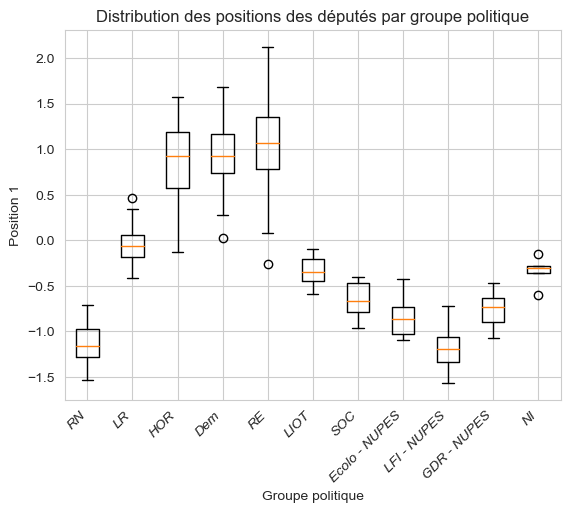

In [10]:
# Définir la couleur du fond du graphique à afficher
sns.set_style("whitegrid")

# Définir l'ordre des groupes politiques en fonction de leur place dans l'émicycle
ordre_groupes = ['RN', 'LR','HOR','Dem', 'RE', 'LIOT', 'SOC', 'Ecolo - NUPES', 'LFI - NUPES', 'GDR - NUPES', 'NI']

# Réorganisation des données selon l'ordre souhaité
merged_df = merged_df.reset_index().set_index("Groupe politique (abrégé)").loc[ordre_groupes]

# Création d'une liste contenant les positions pour chaque groupe politique
positions_par_groupe = [merged_df.loc[g]["Position 1"].values for g in ordre_groupes]

# Création du graphique en boîte à moustaches
fig, ax = plt.subplots()
ax.boxplot(positions_par_groupe)

# Ajout des labels et du titre
ax.set_xticklabels(ordre_groupes, rotation=45, ha='right', fontdict={'fontstyle': 'oblique'})
ax.set_xlabel("Groupe politique")
ax.set_ylabel("Position 1")
ax.set_title("Distribution des positions des députés par groupe politique")

# Affichage du graphique
plt.show()

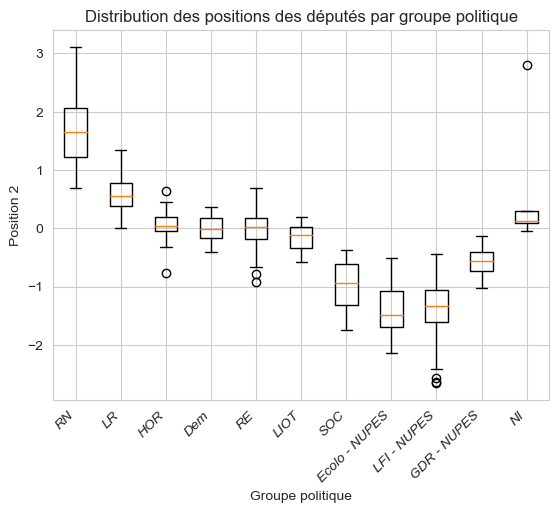

In [11]:
# Définir la couleur du fond du graphique à afficher
sns.set_style("whitegrid")

# Définir l'ordre des groupes politiques en fonction de leur place dans l'émicycle
ordre_groupes = ['RN', 'LR','HOR','Dem', 'RE', 'LIOT', 'SOC', 'Ecolo - NUPES', 'LFI - NUPES', 'GDR - NUPES', 'NI']

# Réorganisation des données selon l'ordre souhaité
merged_df = merged_df.reset_index().set_index("Groupe politique (abrégé)").loc[ordre_groupes]

# Création d'une liste contenant les positions pour chaque groupe politique
positions_par_groupe = [merged_df.loc[g]["Position 2"].values for g in ordre_groupes]

# Création du graphique en boîte à moustaches
fig, ax = plt.subplots()
ax.boxplot(positions_par_groupe)

# Ajout des labels et du titre
ax.set_xticklabels(ordre_groupes, rotation=45, ha='right', fontdict={'fontstyle': 'oblique'})
ax.set_xlabel("Groupe politique")
ax.set_ylabel("Position 2")
ax.set_title("Distribution des positions des députés par groupe politique")

# Affichage du graphique
plt.show()

L'étude des deux axes simultanéments fait apparaitre clairement un comportement bimodale selon l'axe 1 et unimodale selon l'axe 2. La mise en visibilité des partis politiques confime notre analyse précédente. Il existe bien un comportement anti/pro-grouvernement qui explique de façon majoritaire-relative la manière de voter des députés de l'Assemblée nationale.
Egalement on observe bien une polarisationent trois branches de l'émicycle avec un groupement centre-centre-droit majoritaire et deux groupements minoritaires mais significatifs de gauche et de droite.

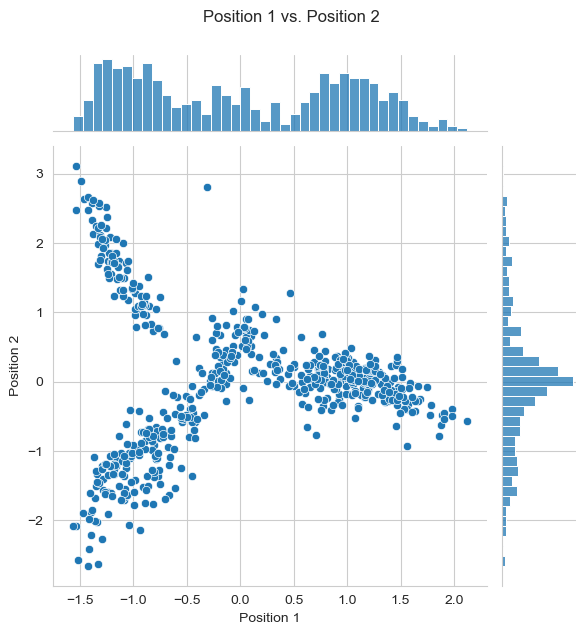

In [12]:
# Créer un scatterplot avec une distribution marginale pour chaque variable
g = sns.jointplot(data=merged_df, x='Position 1', y='Position 2', marginal_kws=dict(bins=40))

# Modifier la légende et le titre
g.fig.suptitle('Position 1 vs. Position 2', y=1.05)

# Afficher le graphique
plt.show()

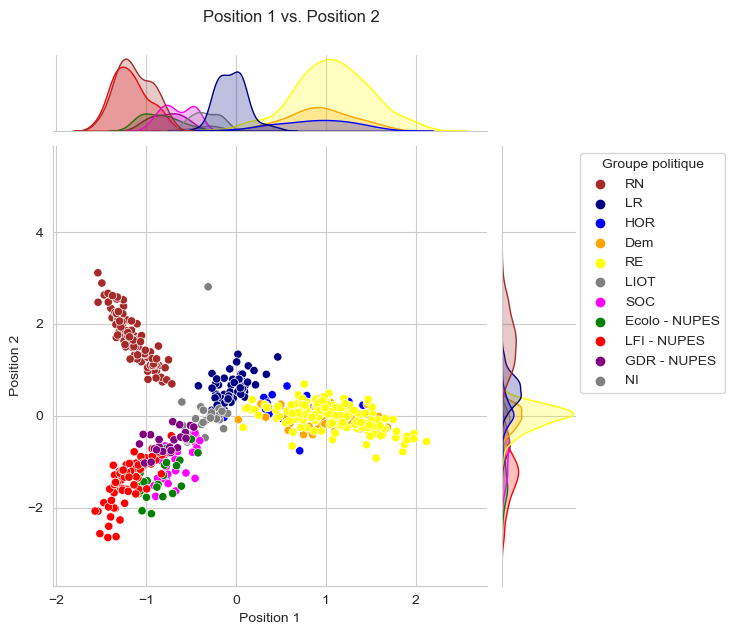

In [13]:
# Définir les couleurs à afficher
colors = {'RN': 'brown', 
          'LR': 'navy', 
          'HOR': 'blue', 
          'Dem': 'orange', 
          'RE': 'yellow', 
          'LIOT': 'grey', 
          'SOC': 'magenta', 
          'Ecolo - NUPES': 'green', 
          'LFI - NUPES': 'red', 
          'GDR - NUPES': 'purple', 
          'NI': 'grey'}

# Créer un scatterplot avec une distribution marginale pour chaque variable
g = sns.jointplot(data=merged_df, x='Position 1', y='Position 2', hue='Groupe politique (abrégé)', palette=colors)

# Modifier la légende et le titre
g.ax_joint.legend(title='Groupe politique', loc='upper left', bbox_to_anchor=(1.2, 1))
g.fig.suptitle('Position 1 vs. Position 2', y=1.05)

# Afficher le graphique
plt.show()